In [26]:
# Fonots

# Ez a kis fostalicska csak arra kell, hogy belenézzek a metric_log-ba

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time
from pandas.plotting import scatter_matrix

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-29 19:51:45
19:51:45


In [2]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,07:04:51,07:04:5,87.38780,44.885000,1,0.5,1.111111,98.0,1.444444,...,81884.444444,680022.222222,0.0,64116.0,100.0,9.111111,9.111111,6.222222,9.111111,6.222222
1,192.168.0.170,07:05:01,07:05:0,56.67945,34.371833,1,1.2,1.111111,98.0,1.444444,...,81884.444444,680022.222222,0.0,64116.0,100.0,9.111111,9.111111,6.222222,9.111111,6.222222
2,192.168.0.170,07:05:10,07:05:1,49.07500,30.132182,1,1.1,1.111111,98.0,1.444444,...,81884.444444,680022.222222,0.0,64116.0,100.0,9.111111,9.111111,6.222222,9.111111,6.222222
3,192.168.0.170,07:05:20,07:05:2,589.41595,113.769111,3,1.8,1.111111,98.0,1.444444,...,81884.444444,680022.222222,0.0,64116.0,100.0,9.111111,9.111111,6.222222,9.111111,6.222222
4,192.168.0.170,07:05:31,07:05:3,50.78050,28.360050,1,2.0,1.111111,98.0,1.444444,...,81884.444444,680022.222222,0.0,64116.0,100.0,9.111111,9.111111,6.222222,9.111111,6.222222


In [3]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

In [4]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,220.00,63.00,62.49,33.67,42.01,49.37,62.95,606.07
response_time,220.00,35.03,12.47,18.95,28.31,31.48,36.52,113.77
worker_number,220.00,4.84,2.89,1.00,2.00,4.50,7.25,9.00
request_rate,220.00,16.98,13.13,0.20,5.00,15.50,29.73,40.00
CPU0User%,220.00,1.11,0.00,1.11,1.11,1.11,1.11,1.11
CPU0Idle%,220.00,98.00,0.00,98.00,98.00,98.00,98.00,98.00
CPU0Total%,220.00,1.44,0.00,1.44,1.44,1.44,1.44,1.44
[DSK:sda]Reads,220.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
[DSK:sda]RMerge,220.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
[DSK:sda]RKBytes,220.00,20.00,0.00,20.00,20.00,20.00,20.00,20.00


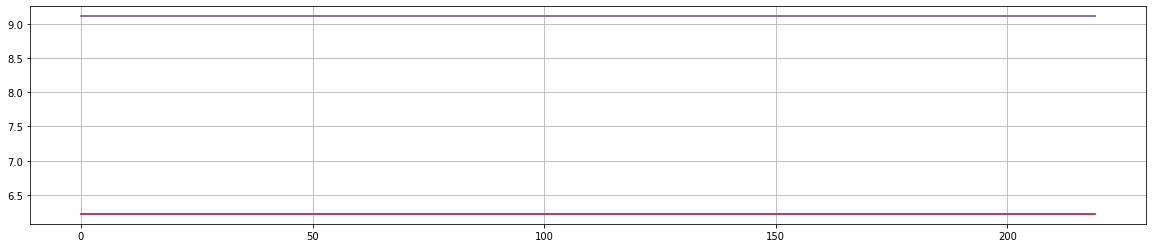

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

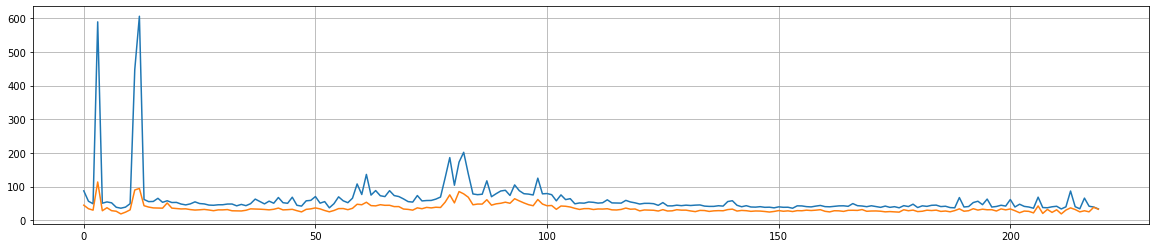

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

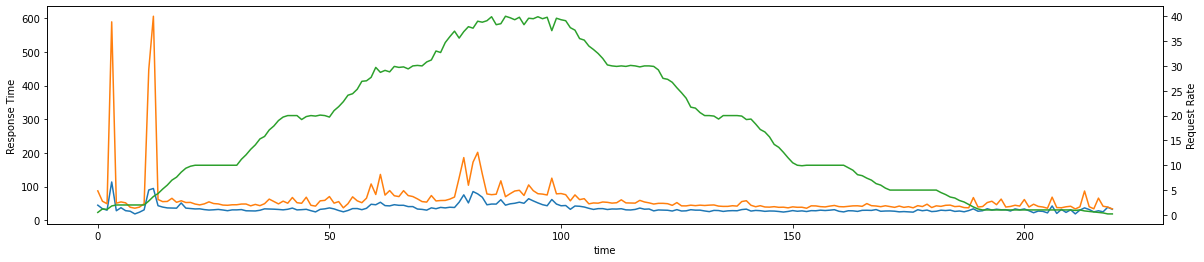

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

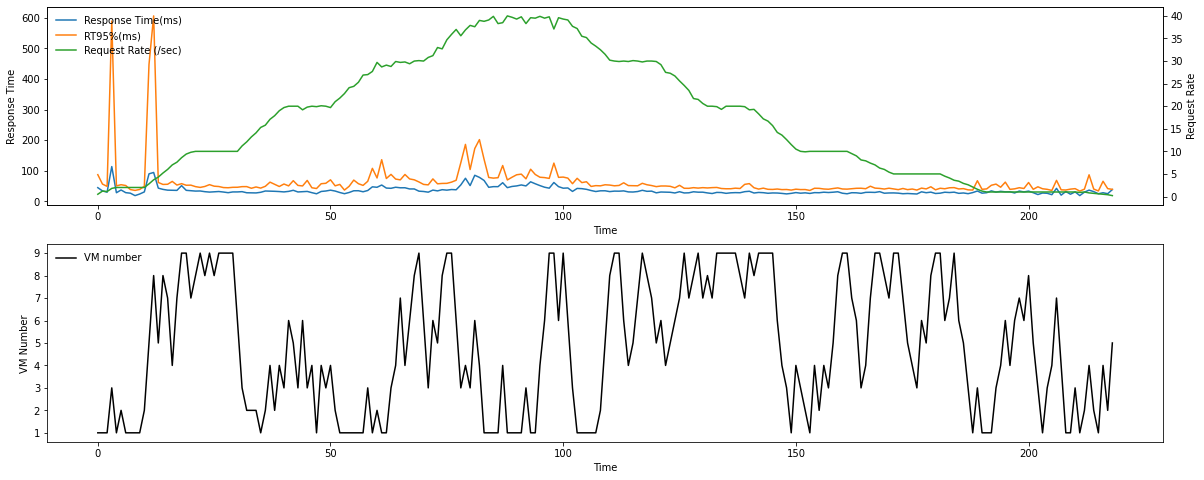

In [8]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

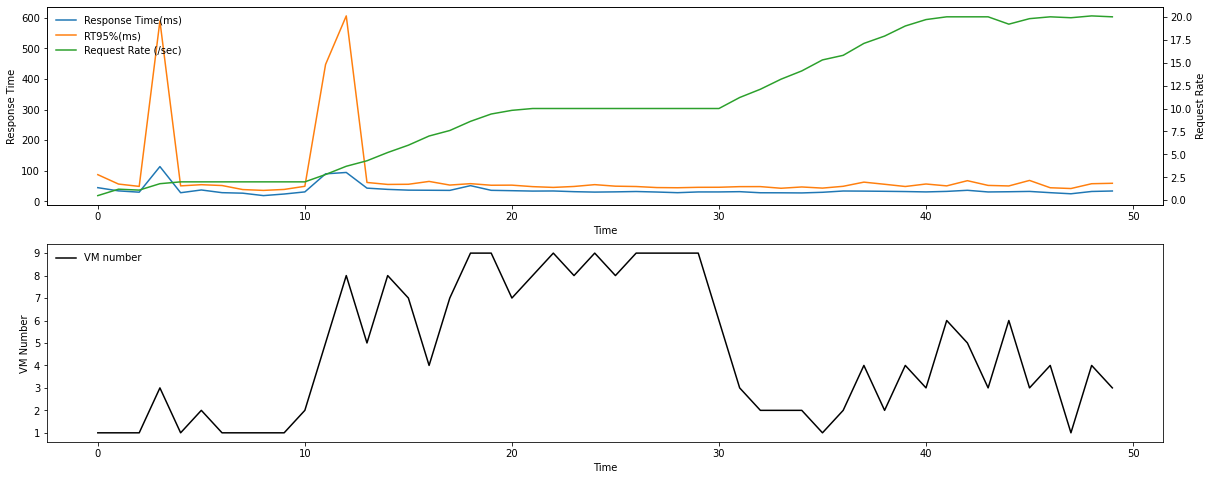

In [9]:
show(0, 50)

In [10]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,220.00,220.00,220.00,220.00
mean,63.00,35.03,4.84,16.98
std,62.49,12.47,2.89,13.13
min,33.67,18.95,1.00,0.20
25%,42.01,28.31,2.00,5.00
50%,49.37,31.48,4.50,15.50
75%,62.95,36.52,7.25,29.73
max,606.07,113.77,9.00,40.00


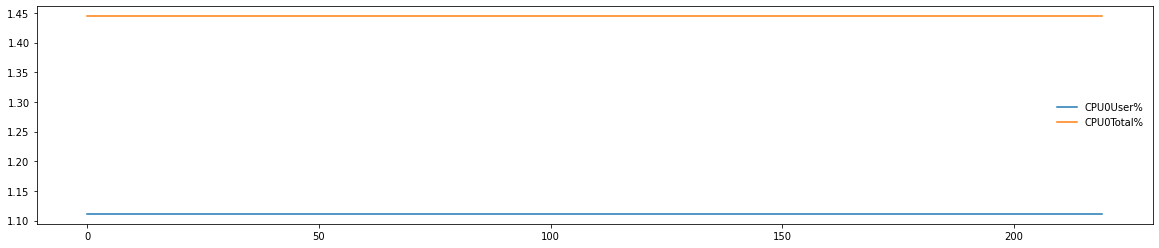

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [12]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,220.00,220.00,220.00
mean,1.11,98.00,1.44
std,0.00,0.00,0.00
min,1.11,98.00,1.44
25%,1.11,98.00,1.44
50%,1.11,98.00,1.44
75%,1.11,98.00,1.44
max,1.11,98.00,1.44


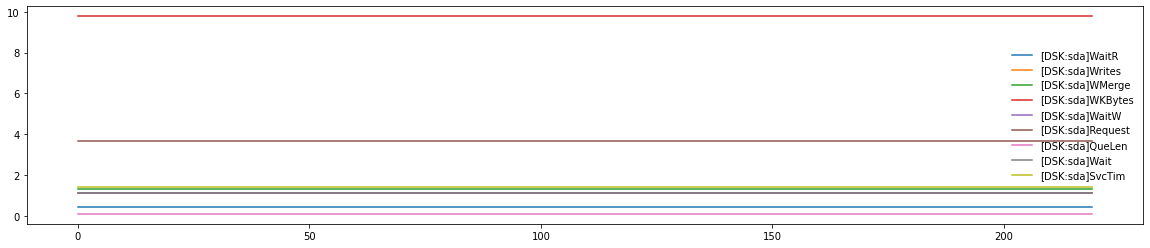

In [13]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00
25%,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00
50%,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00
75%,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00
max,1.00,0.00,20.00,0.44,1.11,1.33,9.78,1.11,3.67,0.11,1.11,1.44,1.00


In [15]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00
25%,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00
50%,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00
75%,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00
max,"943,687.56","61,024.44","91,072.44","81,884.44","680,022.22",0.00,"64,116.00",100.00


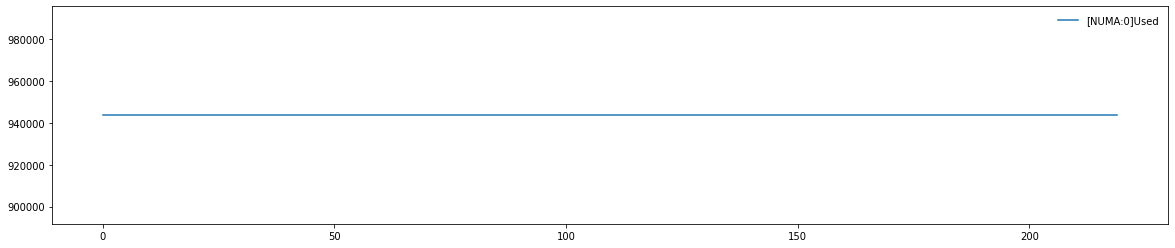

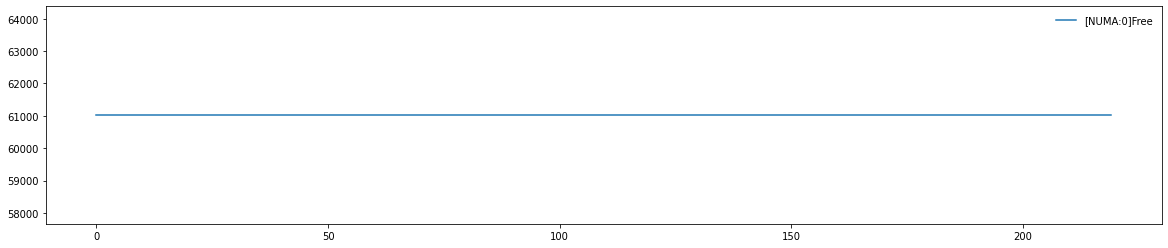

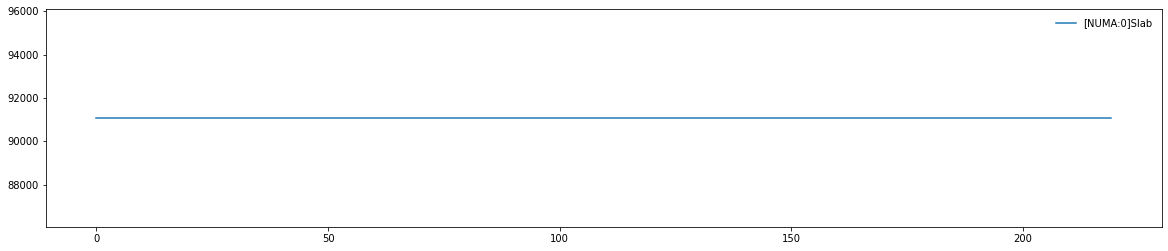

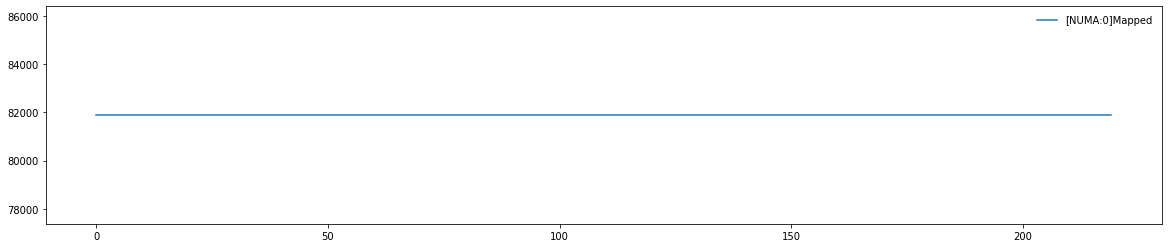

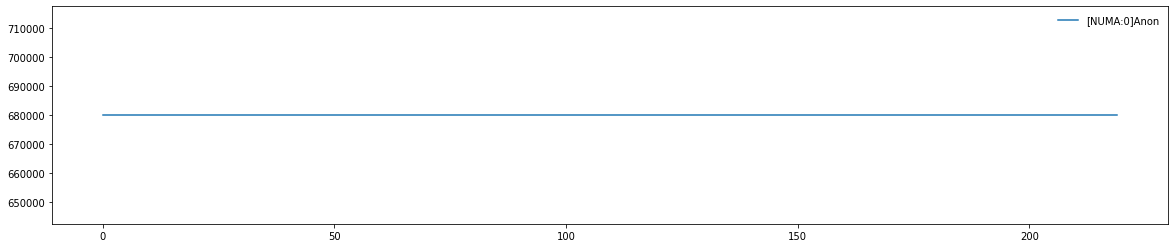

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

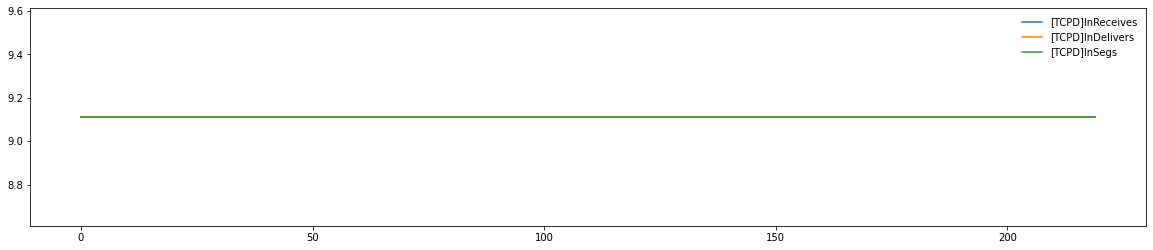

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.170,07:04:51,07:04:5,87.39,44.89,1,0.50,1.11,98.00,1.44,...,100.00,9.11,9.11,6.22,9.11,6.22,1,NaN,1.00,0.00
1,192.168.0.170,07:05:01,07:05:0,56.68,34.37,1,1.20,1.11,98.00,1.44,...,100.00,9.11,9.11,6.22,9.11,6.22,1,1.00,1.00,0.00
2,192.168.0.170,07:05:10,07:05:1,49.08,30.13,1,1.10,1.11,98.00,1.44,...,100.00,9.11,9.11,6.22,9.11,6.22,1,1.00,3.00,2.00
3,192.168.0.170,07:05:20,07:05:2,589.42,113.77,3,1.80,1.11,98.00,1.44,...,100.00,9.11,9.11,6.22,9.11,6.22,3,1.00,1.00,-2.00
4,192.168.0.170,07:05:31,07:05:3,50.78,28.36,1,2.00,1.11,98.00,1.44,...,100.00,9.11,9.11,6.22,9.11,6.22,1,3.00,2.00,1.00


In [19]:
mf['delta_vm'].unique()

array([ 0.,  2., -2.,  1., -1.,  3., -3., nan])

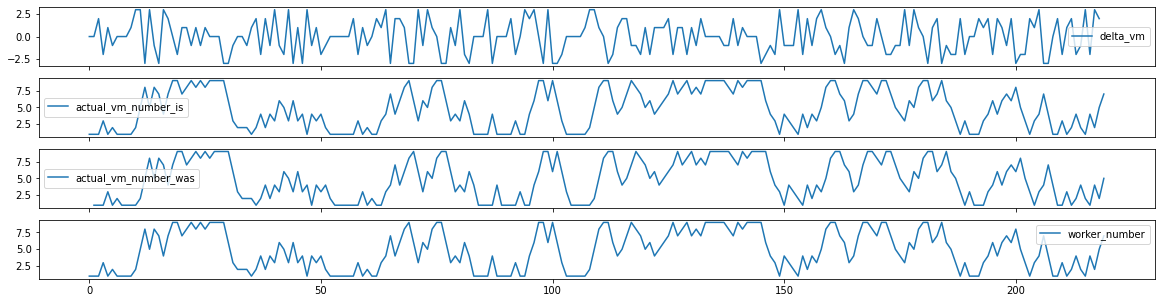

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

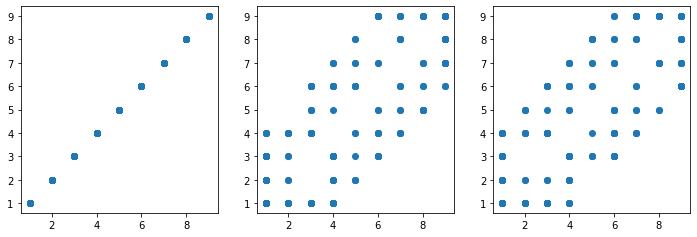

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

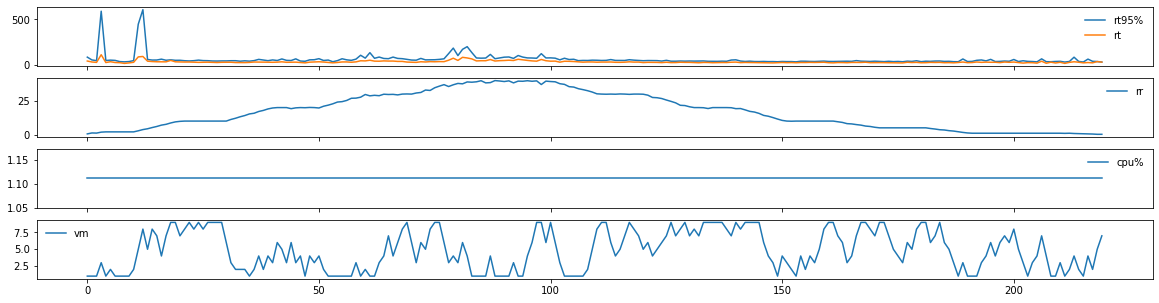

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

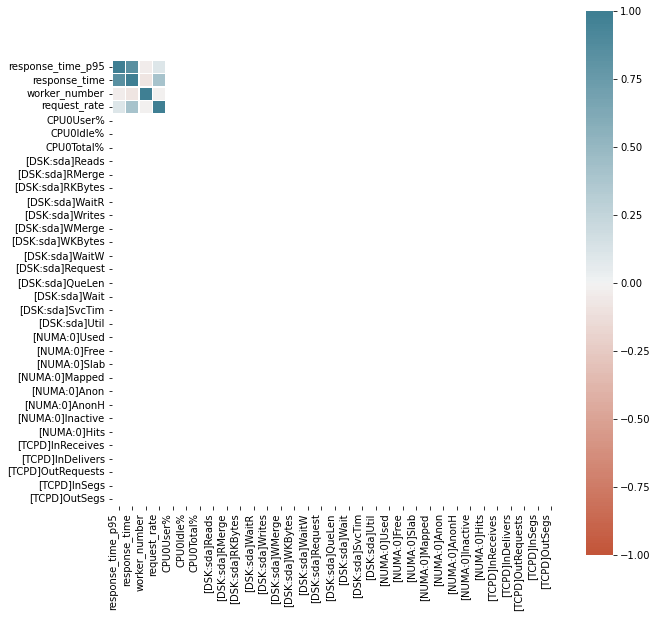

In [27]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [28]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

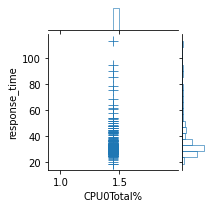

In [33]:
sns.jointplot(
    height=3.0,
    data=df, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

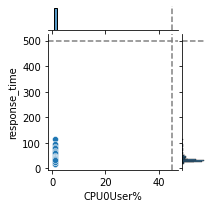

In [34]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

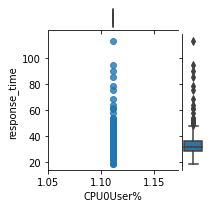

In [35]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

/home/ubuntu/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/ubuntu/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/ubuntu/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/ubuntu/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/ubuntu/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning:

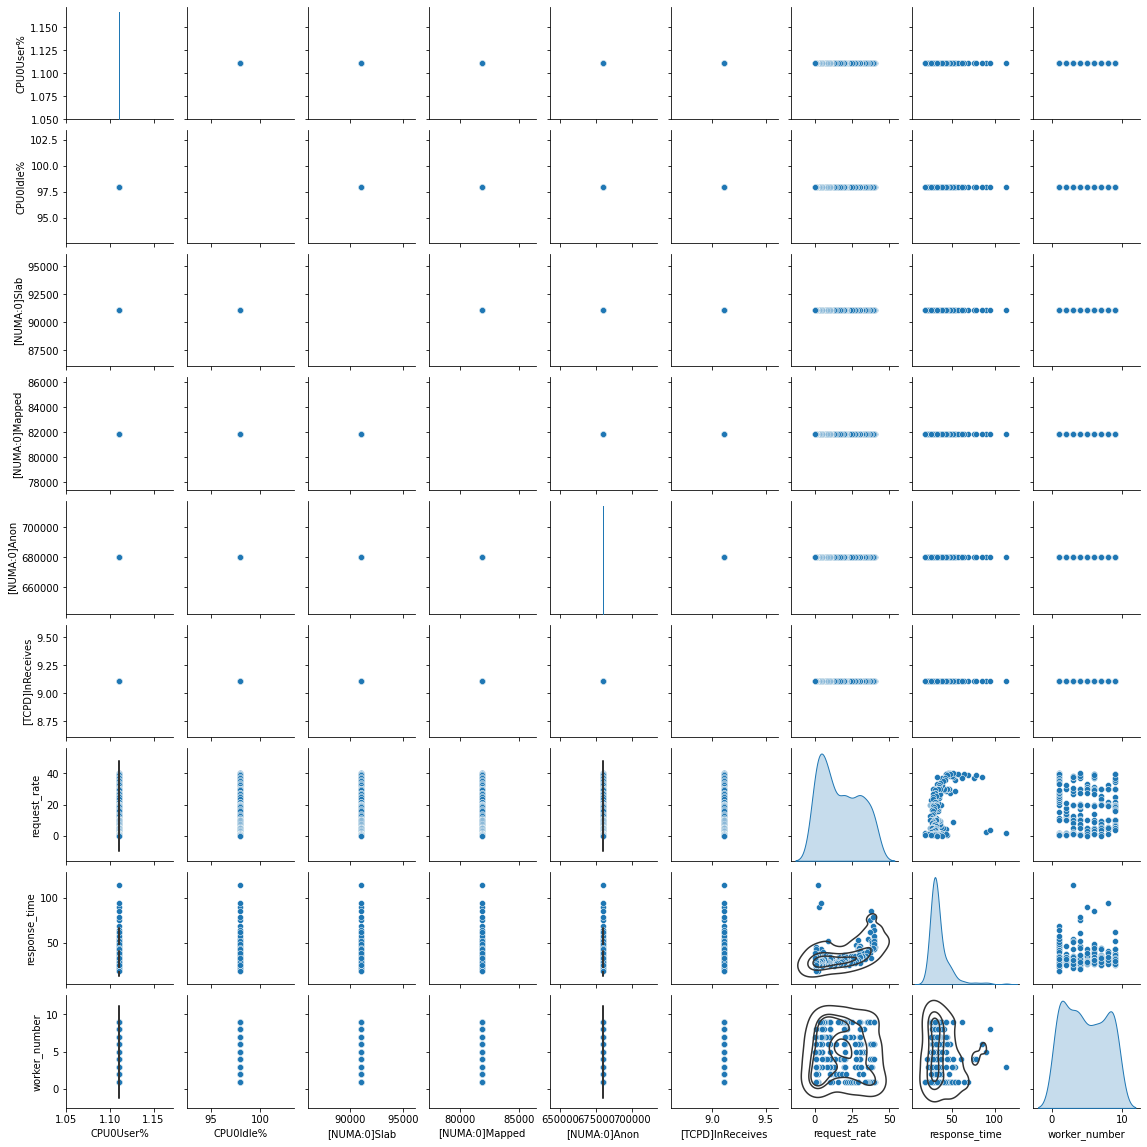

In [41]:
g = sns.pairplot(df[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

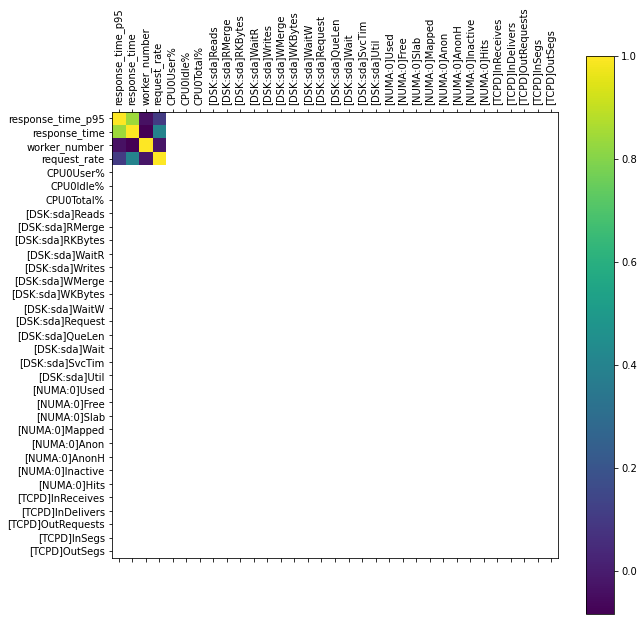

In [39]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

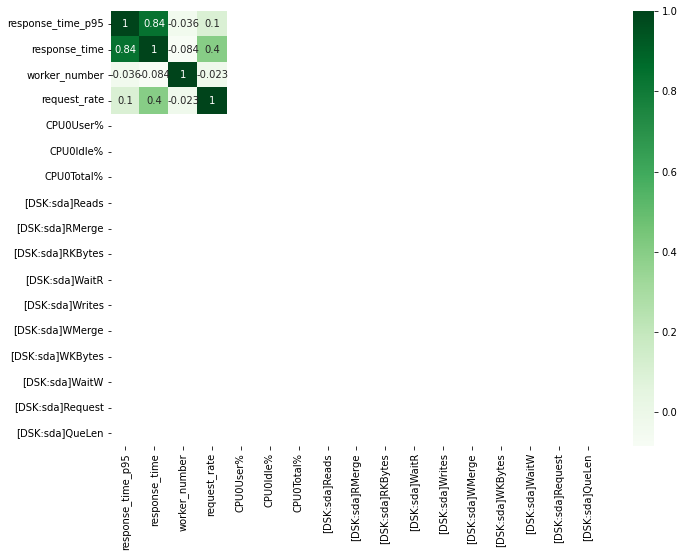

In [43]:
df = df.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
df.isnull().values.any()

In [ ]:
# kibaszni azokat az oszlopokat amelyek értéke konstans

for c in df.select_dtypes(exclude='object').columns:
    std = df[c].std()
    if std == 0:
        df.drop([c], axis=1, inplace=True)
        print(c)

ValueError: The condensed distance matrix must contain only finite values.

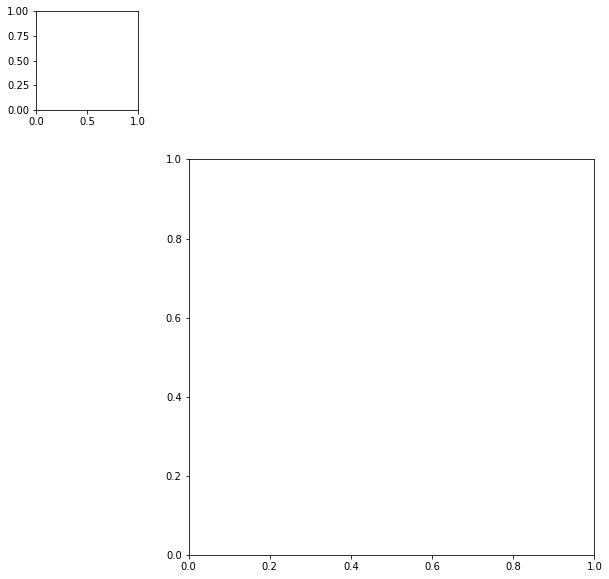

In [44]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

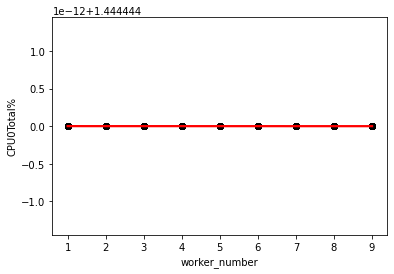

In [45]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

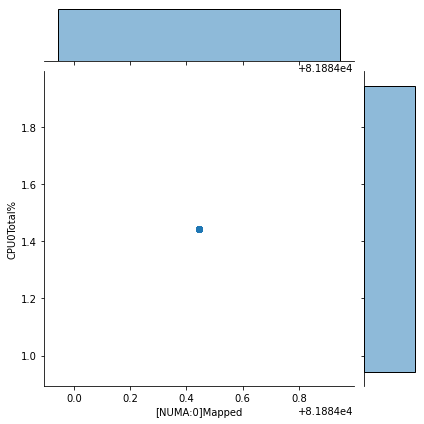

In [46]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

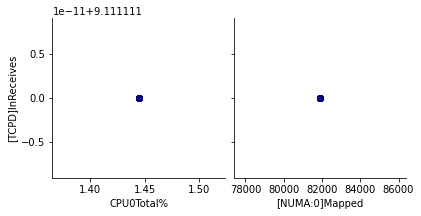

In [124]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [229]:

# Itt a vége fuss el véle


In [226]:
# Control the chaos